<a href="https://colab.research.google.com/github/jgxuann/Prisoners-Dilemma-Data-Analysis/blob/main/questionnaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install.packages(c("ggplot2", "dplyr", "ggpubr"))
install.packages("readxl")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [ ]:
library(ggplot2)
library(dplyr)
library(ggpubr)
library(readxl)

# 路径
file_path <- "/content/questionnaire.xlsx"

# 读取 Excel 文件
# 读取名为"Sheet2"的工作表
data <- read_excel(file_path)

# 显示数据的前几行
head(data)


ID,Age,Gender,Q1,Q2,Q3,Q4,Q5,Q6,Q9,Q10
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M1,23,Male,2,1,2,2,2,231,123,231
M2,23,Male,2,1,2,2,2,123,123,321
M3,23,Male,1,1,1,2,2,312,132,132
M4,22,Male,2,1,2,2,2,312,321,132
M5,24,Male,2,2,2,1,2,312,123,231
M6,26,Male,2,2,2,2,2,231,231,231


In [ ]:
# 加载必要的R包
library(tidyverse)

# Step 1: 创建数据框并添加性别信息
data <- data.frame(
  Group1 = c(231, 123, 312, 312, 312, 231, 123, 123, 213, 123, 321,
             123, 312, 312, 123, 213, 231, 132, 132, 123, 132, 231,
             123, 321, 123, 213, 132, 123, 132, 231),
  Group2 = c(123, 123, 132, 321, 123, 231, 123, 123, 123, 321, 132,
             213, 312, 321, 123, 132, 213, 123, 132, 213, 123, 123,
             132, 123, 123, 312, 123, 213, 123, 123),
  Group3 = c(231, 321, 132, 132, 231, 231, 321, 132, 123, 123, 132,
             231, 213, 321, 312, 132, 213, 312, 231, 312, 321, 123,
             123, 321, 321, 213, 213, 321, 231, 321)
)

# 添加性别信息，前15个是男性，后15个是女性
data <- data %>%
  mutate(
    Gender = rep(c("Male", "Female"), each = 15)
  )

# Step 2: 将每列数据分离为独立的排名，并添加性别信息
data_long <- data %>%
  pivot_longer(cols = starts_with("Group"), names_to = "Group", values_to = "Rank") %>%
  mutate(
    A = substr(Rank, 1, 1),
    B = substr(Rank, 2, 2),
    C = substr(Rank, 3, 3)
  )

# Step 3: 计算每个选项在每个排名中的频次，分别针对男性、女性和总人群
calculate_top_ranks <- function(data) {
  # 计算每个选项在每个位置的频次
  freq_A <- data %>%
    count(Group, A) %>%
    rename(Frequency = n, Option = A)

  freq_B <- data %>%
    count(Group, B) %>%
    rename(Frequency = n, Option = B)

  freq_C <- data %>%
    count(Group, C) %>%
    rename(Frequency = n, Option = C)

  # 找到每个位置频次最多的选项
  top_A <- freq_A %>%
    group_by(Group) %>%
    top_n(1, Frequency) %>%
    ungroup() %>%
    mutate(Position = "First")

  top_B <- freq_B %>%
    group_by(Group) %>%
    top_n(1, Frequency) %>%
    ungroup() %>%
    mutate(Position = "Second")

  top_C <- freq_C %>%
    group_by(Group) %>%
    top_n(1, Frequency) %>%
    ungroup() %>%
    mutate(Position = "Third")

  # 合并结果
  top_ranks <- bind_rows(top_A, top_B, top_C) %>%
    select(Group, Position, Option, Frequency)

  return(top_ranks)
}

# 计算男性、女性和总人群的前几名
top_ranks_male <- calculate_top_ranks(data_long %>% filter(Gender == "Male"))
top_ranks_female <- calculate_top_ranks(data_long %>% filter(Gender == "Female"))
top_ranks_total <- calculate_top_ranks(data_long)

# 打印结果
print("男性排名结果:")
print(top_ranks_male)

print("女性排名结果:")
print(top_ranks_female)

print("总人群排名结果:")
print(top_ranks_total)


[1] "男性排名结果:"
# A tibble: 10 × 4
   Group  Position Option Frequency
   <chr>  <chr>    <chr>      <int>
 1 Group1 First    1              6
 2 Group1 First    3              6
 3 Group2 First    1              9
 4 Group3 First    1              6
 5 Group1 Second   2              7
 6 Group2 Second   2             10
 7 Group3 Second   3              8
 8 Group1 Third    3              7
 9 Group2 Third    3              8
10 Group3 Third    1              7
[1] "女性排名结果:"
# A tibble: 9 × 4
  Group  Position Option Frequency
  <chr>  <chr>    <chr>      <int>
1 Group1 First    1              9
2 Group2 First    1             11
3 Group3 First    3              7
4 Group1 Second   3              8
5 Group2 Second   2              8
6 Group3 Second   2              7
7 Group1 Third    3              6
8 Group2 Third    3             11
9 Group3 Third    1              7
[1] "总人群排名结果:"
# A tibble: 9 × 4
  Group  Position Option Frequency
  <chr>  <chr>    <chr>      <int>
1 Group1 First 

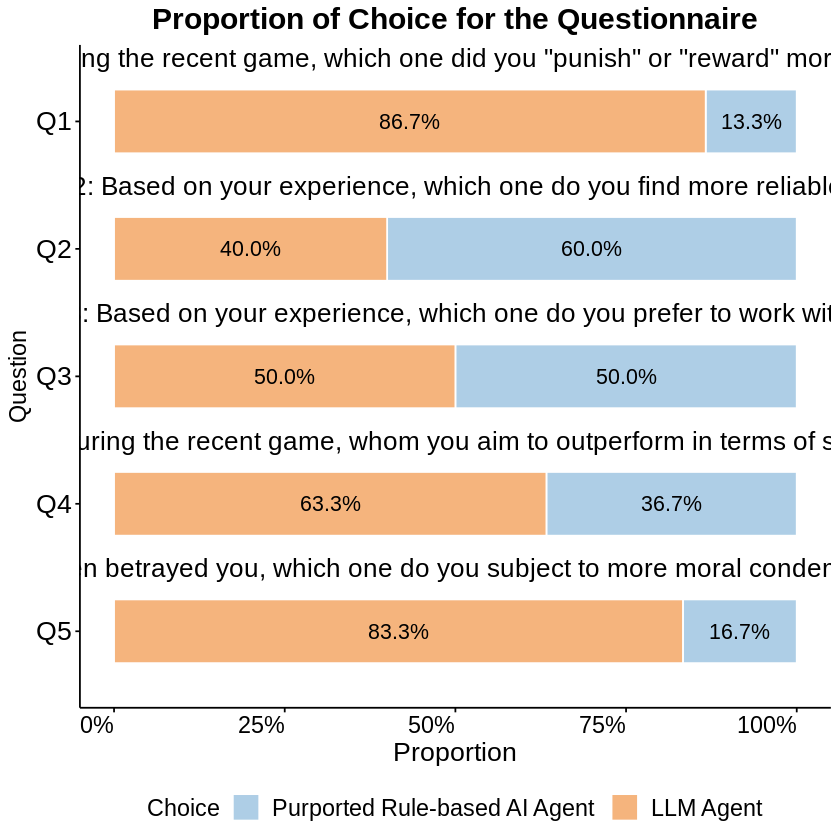

In [ ]:
# 加载必要的包
library(dplyr)
library(tidyr)
library(ggplot2)
library(scales)  # 加载 scales 包

# 假设你的数据已经读入并命名为 data
# 选择 Q1 到 Q5 列
data_selected <- data %>% select(Q1:Q5)

# 计算每个问题中 1 和 2 的比例
proportions <- data_selected %>%
  pivot_longer(cols = everything(), names_to = "Question", values_to = "Answer") %>%  # 将数据转换为长格式
  filter(Answer %in% c(1, 2)) %>%  # 仅保留答案为 1 和 2 的行
  group_by(Question, Answer) %>%  # 按问题和答案分组
  summarise(Count = n(), .groups = 'drop') %>%  # 计算每组的计数
  group_by(Question) %>%  # 按问题分组
  mutate(TotalCount = sum(Count),  # 计算每个问题的总回答数
         Proportion = Count / TotalCount)  # 计算比例

# 调整 Question 因子级别顺序为 Q5, Q4, Q3, Q2, Q1 从上到下
proportions$Question <- factor(proportions$Question, levels = c("Q5", "Q4", "Q3", "Q2", "Q1"))

# 自定义文本标签
custom_labels <- c("Q5: When betrayed you, which one do you subject to more moral condemnation?",  # 替换为你的自定义文本
                   "Q4: During the recent game, whom you aim to outperform in terms of score?",
                   "Q3: Based on your experience, which one do you prefer to work with?",
                   "Q2: Based on your experience, which one do you find more reliable?",
                   "Q1: During the recent game, which one did you \"punish\" or \"reward\" more often?")

# 将自定义标签添加到数据框中
label_mapping <- data.frame(Question = levels(proportions$Question), CustomLabel = custom_labels, stringsAsFactors = FALSE)

# 合并自定义标签
proportions <- merge(proportions, label_mapping, by = "Question")

# 保留每个问题的唯一标签
unique_labels <- proportions %>%
  group_by(Question) %>%
  slice(1) %>%
  ungroup()

# 调色板
colors <- c("#79ADD699", "#EE822799")

# 创建条形图
p <- ggplot(proportions, aes(y = Question, x = Proportion, fill = as.factor(Answer))) +
  geom_bar(stat = "identity", position = "stack", color = "white", width = 0.5) +  # 堆积条形图，设置边框颜色为白色
  scale_fill_manual(values = colors,  # 手动设置填充颜色
                    breaks = c("1", "2"),  # 图例中显示的值
                    labels = c("Purported Rule-based AI Agent", "LLM Agent")) +  # 图例中显示的标签
  geom_text(aes(label = scales::percent(Proportion)),
            position = position_stack(vjust = 0.5), size = 4.5, color = "black") +  # 添加比例标签
  geom_text(data = unique_labels, aes(x = 0.5, label = CustomLabel),  # 在 x 轴中间位置添加自定义标签
            hjust = 0.5, vjust = -3, size = 5.5, color = "black") +  # 调整标签位置和大小
  scale_x_continuous(labels = percent_format()) +  # 使用百分比格式显示 x 轴标签
  labs(title = "Proportion of Choice for the Questionnaire",  # 图的标题
       x = "Proportion",  # x 轴标签
       y = "Question",  # y 轴标签
       fill = "Choice") +  # 图例标题
  theme_minimal() +  # 使用极简主题
  theme(
    # 你可以在这里修改全局文字大小和颜色
    text = element_text(size = 14, color = "black"),  # 设置全局文字大小和颜色
    legend.position = "bottom",  # 将图例放在下方
    # 你可以在这里修改图例标题的大小和颜色
    legend.title = element_text(size = 14, color = "black"),  # 调整图例标题的大小和颜色
    # 你可以在这里修改图例文本的大小和颜色
    legend.text = element_text(size = 14, color = "black"),  # 调整图例文本的大小和颜色
    # 你可以在这里修改图标题的大小、位置和颜色
    plot.title = element_text(hjust = 0.5, size = 18, face = "bold", color = "black"),  # 调整图标题的大小、位置和颜色
    # 你可以在这里修改 x 轴标签的角度、大小和颜色
    axis.text.x = element_text(hjust = 1, size = 14, color = "black"),  # 旋转 x 轴标签并调整大小和颜色
    # 你可以在这里修改 y 轴标签的大小和颜色
    axis.text.y = element_text(size = 16, color = "black"),  # 调整 y 轴标签的大小和颜色
    # 你可以在这里修改 x 轴标题的大小和颜色
    axis.title.x = element_text(size = 16, color = "black"),  # 调整 x 轴标题的大小和颜色
    # 你可以在这里修改 y 轴标题的大小和颜色
    axis.title.y = element_text(size = 14, color = "black"),  # 调整 y 轴标题的大小和颜色
    # 你可以在这里修改分面标签的大小、字体和颜色
    strip.text = element_text(size = 12, face = "bold", color = "black"),  # 调整分面标签的大小、字体和颜色
    panel.grid.major = element_blank(),  # 去掉主网格线
    panel.grid.minor = element_blank(),  # 去掉次网格线
    panel.border = element_blank(),  # 去掉面板边框
    axis.line = element_line(color = "black"),  # 自定义轴线颜色
    axis.ticks = element_line(color = "black")  # 自定义刻度线颜色
  )

print(p)

# 保存高清版的图
ggsave(
  filename = "questionnaire.pdf",  # 保存文件名
  plot = p,  # 指定要保存的图
  device = cairo_pdf,  # 使用Cairo库保存高质量的PDF
  width = 10, height = 8,  # 图的宽度和高度（英寸）
  dpi = 300  # 高分辨率
)



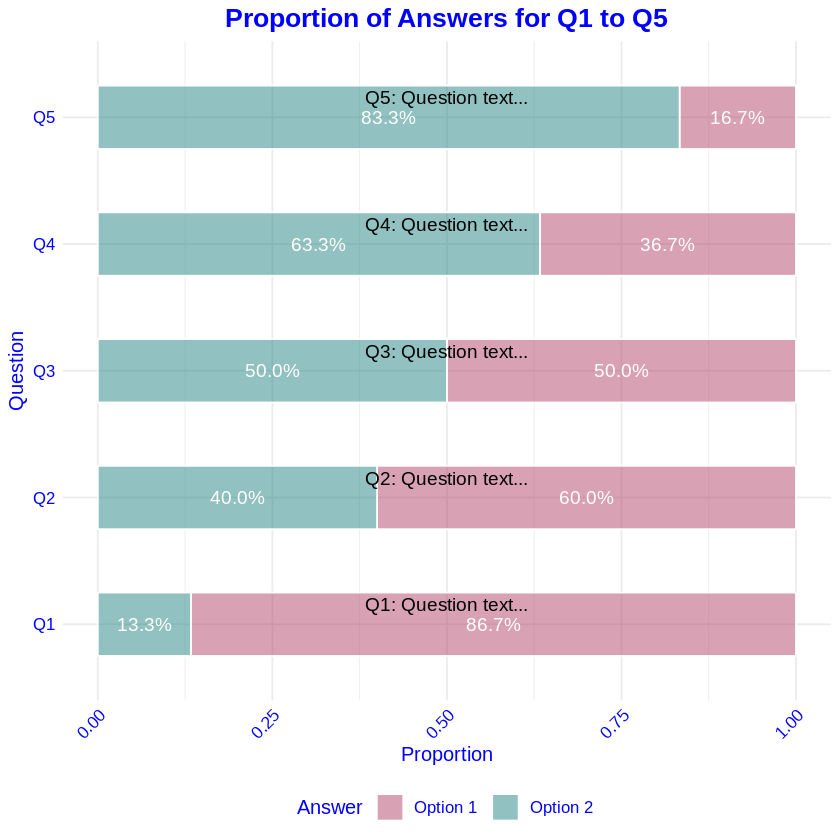

In [ ]:
# 加载必要的包
library(dplyr)
library(tidyr)
library(ggplot2)

# 假设你的数据已经读入并命名为 data
# 选择 Q1 到 Q5 列
data_selected <- data %>% select(Q1:Q5)

# 计算每个问题中 1 和 2 的比例
proportions <- data_selected %>%
  pivot_longer(cols = everything(), names_to = "Question", values_to = "Answer") %>%  # 将数据转换为长格式
  filter(Answer %in% c(1, 2)) %>%  # 仅保留答案为 1 和 2 的行
  group_by(Question, Answer) %>%  # 按问题和答案分组
  summarise(Count = n(), .groups = 'drop') %>%  # 计算每组的计数
  group_by(Question) %>%  # 按问题分组
  mutate(TotalCount = sum(Count),  # 计算每个问题的总回答数
         Proportion = Count / TotalCount)  # 计算比例

# 调整 Question 因子级别顺序为 Q1, Q2, Q3, Q4, Q5 从上到下
proportions$Question <- factor(proportions$Question, levels = c("Q1", "Q2", "Q3", "Q4", "Q5"))

# 自定义文本标签
custom_labels <- c("Q1: Question text...", "Q2: Question text...", "Q3: Question text...", "Q4: Question text...", "Q5: Question text...")  # 替换为你的自定义文本

# 将自定义标签添加到数据框中
label_mapping <- data.frame(Question = levels(proportions$Question), CustomLabel = custom_labels, stringsAsFactors = FALSE)

# 合并自定义标签
proportions <- merge(proportions, label_mapping, by = "Question")

# 保留每个问题的唯一标签
unique_labels <- proportions %>%
  group_by(Question) %>%
  slice(1) %>%
  ungroup()

# 调色板
colors <- c("#B2446B80", "#27838380")  # 使用透明度（80 为 50% 透明度）

# 创建条形图
ggplot(proportions, aes(y = Question, x = Proportion, fill = as.factor(Answer))) +
  geom_bar(stat = "identity", position = "stack", color = "white", width = 0.5) +  # 堆积条形图
  scale_fill_manual(values = colors,  # 手动设置填充颜色
                    breaks = c("1", "2"),  # 图例中显示的值
                    labels = c("Option 1", "Option 2")) +  # 图例中显示的标签
  geom_text(aes(label = scales::percent(Proportion)),
            position = position_stack(vjust = 0.5), size = 4, color = "white") +  # 添加比例标签
  geom_text(data = unique_labels, aes(x = 0.5, label = CustomLabel),  # 在 x 轴中间位置添加自定义标签
            hjust = 0.5, vjust = -1, size = 4, color = "black") +  # 调整标签位置和大小
  labs(title = "Proportion of Answers for Q1 to Q5",  # 图的标题
       x = "Proportion",  # x 轴标签
       y = "Question",  # y 轴标签
       fill = "Answer") +  # 图例标题
  theme_minimal() +  # 使用极简主题
  theme(
    text = element_text(size = 14, color = "black"),  # 设置全局文字大小和颜色
    legend.position = "bottom",  # 将图例放在下方
    legend.title = element_text(size = 12, color = "blue"),  # 调整图例标题的大小和颜色
    legend.text = element_text(size = 10, color = "blue"),  # 调整图例文本的大小和颜色
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold", color = "blue"),  # 调整图标题的大小、位置和颜色
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10, color = "blue"),  # 旋转 x 轴标签并调整大小和颜色
    axis.text.y = element_text(size = 10, color = "blue"),  # 调整 y 轴标签的大小和颜色
    axis.title.x = element_text(size = 12, color = "blue"),  # 调整 x 轴标题的大小和颜色
    axis.title.y = element_text(size = 12, color = "blue"),  # 调整 y 轴标题的大小和颜色
    strip.text = element_text(size = 12, face = "bold", color = "blue")  # 调整分面标签的大小、字体和颜色
  )


